In [92]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


In [93]:
filepath = './tweets.csv'

df = pd.read_csv(filepath, delimiter=',',
                skiprows=1, # skips the first line of the file
                encoding='unicode_escape', # prevents errors on unknown symbols
                usecols=['Vertex 1', 'Vertex 2', 'Tweet'], # only import the columns we use
                )
df.columns = ['source_user', 'mentioned_user', 'tweet_text']

In [94]:
G = nx.DiGraph()


for source_user, mentioned_user, tweet_text in zip(df.source_user, df.mentioned_user, df.tweet_text):

    if source_user != mentioned_user:
        if "RT" in tweet_text[:3]:
            color = 'red'
        else:
            color = 'green'
        if (source_user, mentioned_user) in G.edges:
            n = G.edges[source_user,mentioned_user]['n'] + 1
        else:
            n = 1

        G.add_edge(source_user, mentioned_user, color=color, n=n)





In [95]:
G.number_of_nodes()

344

In [96]:
G.number_of_edges()

434

In [97]:
measures = {"centrality": {'in_degree': nx.in_degree_centrality(G), 'out_degree': nx.out_degree_centrality(G),
                           'betweenness': nx.betweenness_centrality(G), 'closeness': nx.closeness_centrality(G)}}

In [112]:
colors = []
width = []

for edge in G.edges:
    colors.append(G.edges[edge[0],edge[1]]['color'])
    width.append(pow(G.edges[edge[0],edge[1]]['n'],2))

width

[1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 1,
 25,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

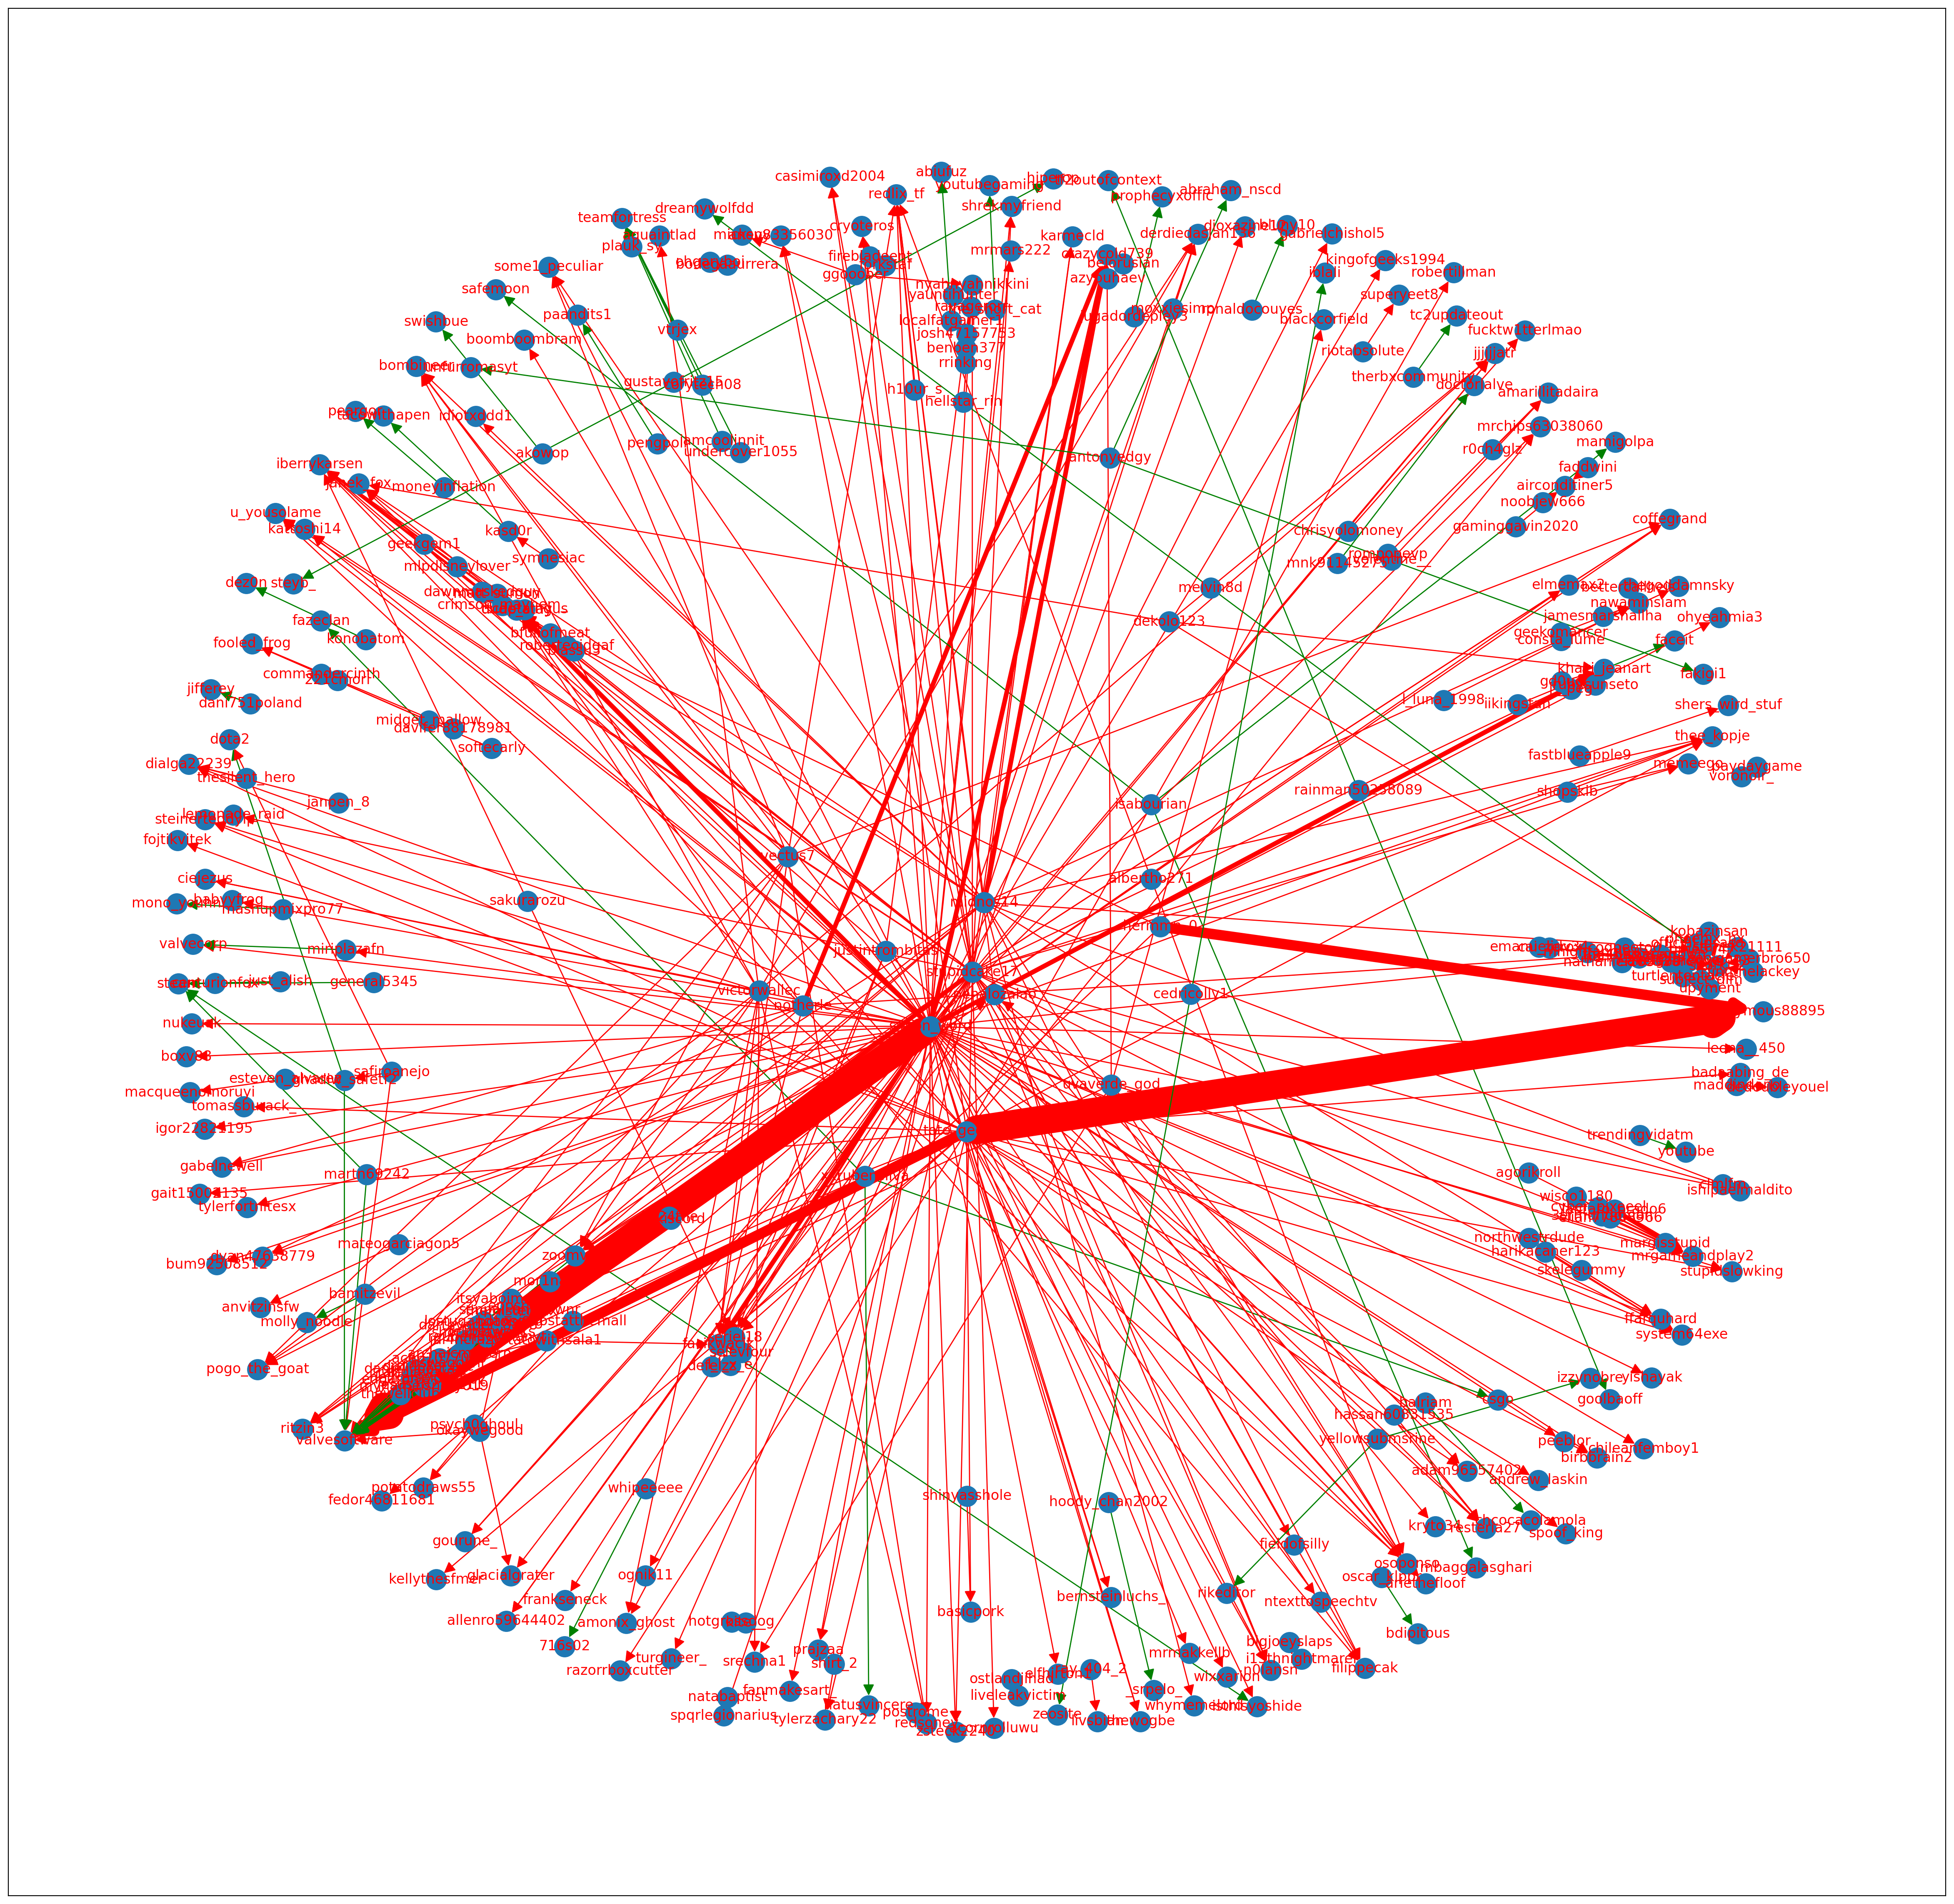

In [113]:
plt.figure(figsize=(30, 30), dpi= 200)
nx.draw_networkx(G= G, arrowsize=20, font_color='red', width=width, edge_color=colors)